### OPERATORNORM WITHOUT ADJOINT 

- Creator:  Jonas Bresch, M.Sc
- Date: February 14rd, 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

import imp

/var/folders/x8/2j6ym0tn7x18f9h9pmv136mc0000gn/T/ipykernel_44441/852982894.py:5: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [2]:
import adjointfreenorm
imp.reload(adjointfreenorm)

<module 'adjointfreenorm' from '/Users/jonasbresch/Desktop/operator_missmatch/finale/adjointfreenorm.py'>

### Figure 3 - 100x500

iter 	| func-value 	| residuum  	| sing-vec-error
10000 	|  4.508e+01 	|  3.381e-01 	|  1.392e-02
||A|| =  45.08044809364563
iter. 	| func-value 	| residuum 	| sing-vec-error
10000 	|  4.492e+01 	|  4.999e-01 	|  8.102e-03
||A|| =  44.91863950650289


/usr/local/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


iter 	| func-value 	| residuum  	| sing-vec-error
10000 	|  4.341e+01 	|  1.987e+00 	|  1.964e-02
||A|| =  43.407370648130545
iter. 	| func-value 	| residuum 	| sing-vec-error
10000 	|  4.388e+01 	|  1.517e+00 	|  1.586e-05
||A|| =  43.87709563832449
iter 	| func-value 	| residuum  	| sing-vec-error
10000 	|  4.397e+01 	|  1.087e+00 	|  1.992e-02
||A|| =  43.967982527632934
iter. 	| func-value 	| residuum 	| sing-vec-error
10000 	|  4.425e+01 	|  8.091e-01 	|  1.187e-02
||A|| =  44.24593356930578
iter 	| func-value 	| residuum  	| sing-vec-error
10000 	|  4.264e+01 	|  1.936e+00 	|  2.034e-02
||A|| =  42.640859243639134
iter. 	| func-value 	| residuum 	| sing-vec-error
10000 	|  4.441e+01 	|  1.678e-01 	|  2.878e-06
||A|| =  44.408693711237134
iter 	| func-value 	| residuum  	| sing-vec-error
10000 	|  4.359e+01 	|  1.116e+00 	|  1.706e-02
||A|| =  43.586800387436625
iter. 	| func-value 	| residuum 	| sing-vec-error
10000 	|  4.348e+01 	|  1.219e+00 	|  6.936e-06
||A|| =  43.4838805004

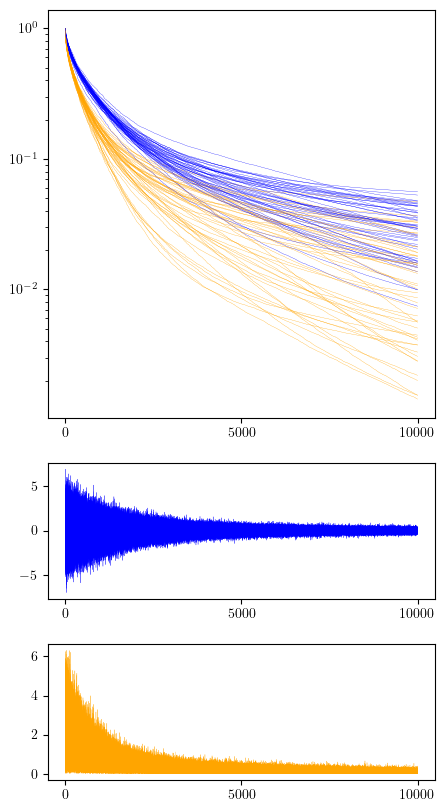

In [5]:
fig, axs = plt.subplots(3, 1, figsize=(5,10), gridspec_kw={'height_ratios': [3, 1, 1]})
for k in range(50):
    A = np.random.randn(100,500)
    V = np.random.randn(500,100)
    _, _, vu_sol_o, _, _, vvvual_o, _, lista_uv_o, _ = adjointfreenorm.MatFreeAdjOpNorm(A=A, V=V, iter=10000, eps=1e-10, show=0)
    _, _, vu_sol, _, _, vuval, _, _, listbc_uv, _, _, _, _, _ = adjointfreenorm.MatFreeAdjOpNormDouble(A=A, V=V, iter=10000, eps=1e-10, show=0)
    axs[0].plot((vu_sol_o-np.abs(vvvual_o))/vu_sol_o, linewidth=0.2, c='b')
    axs[0].plot((vu_sol-np.abs(vuval))/vu_sol, linewidth=0.2, c='orange')
    axs[0].semilogy()
    axs[1].plot(lista_uv_o, linewidth=0.2, c='b')
    axs[2].plot(listbc_uv, linewidth=0.2, c='orange')
    plt.setp(axs, xticks=[0, 5000, 10000], xticklabels=['0', '5000', '10000'])
    plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.savefig('gaussian_matrices_100_500.pdf', dpi=100)
plt.show()